# Longitudinal Phase Space Manipulation

We will discuss several beam manipulation examples in the longitudinal phase space

## Double RF Frequency

Recall that for one RF in the ring, the iteration relations for longitudinal motion reads:

\begin{align}
\Delta E_{n+1}
&=\Delta E_{n} + qV \left(\sin \phi_n-\sin \phi_s\right)\\
\phi_{n+1} 
&= \phi_{n} + \frac{2\pi h \eta}{\beta^2 E_0}  \Delta E_{n+1}
\end{align}
and $\phi_n = \phi_s + \omega t_n$, with $t_n$ as the arriving time difference measured from the ideal particle.

To include the 2nd frequency, we make use subscript $0$ and $1$ for the fundamental frequency $\omega_0$ and the harmonic frequency $\omega_1 = m \omega_0$.  The synchtronous phases are $\phi_{s0}$ and $\phi_{s1}$.  Assuming that the harmonic cavity is close to the fundamental one, the phase for the harmonic frequency is simply 

\begin{align}
\phi_{n,1} = \phi_{s1} + \omega_1 \frac{\phi_{n,0}-\phi_{s0}}{\omega_0} = \phi_{s1} + m (\phi_{n,0}-\phi_{s0})
\end{align}

Therefore we can update the iteration relations for double frequency system using the phase of fundamental frequency $\phi_n$:

\begin{align}
\Delta E_{n+1}
&=\Delta E_{n} + qV_0 \left(\sin \phi_n-\sin \phi_{s0}\right) + qV_1 \left(\sin \left(m \phi_n +\phi_{s1}-m\phi_{s0}\right)-\sin \phi_{s1}\right)\\
\phi_{n+1} 
&= \phi_{n} + \frac{2\pi h \eta}{\beta^2 E_0}  \Delta E_{n+1}
\end{align}

The corresponding differntial equation form for the variable pair $(\phi, \delta)$ becomes:

:::{math}
:label: eq:manipulation:twofreq_diff
\begin{align}
\dot\delta&=\frac{e\omega_0}{2\pi\beta^2E_0}\left[V_0\left(\sin\phi-\sin\phi_{s0}\right)+V_1\left(\sin \left(m \phi +\phi_{s1}-m\phi_{s0}\right)-\sin \phi_{s1}\right)\right]  \\
\dot\phi&=h\omega_0\eta\delta  %%\label{eq:longi_H_eq_2}
\end{align}
:::
where $\omega_0$ is the revolution frequency. 

The longitudinal Hamiltonian for two-frequency system can be constructed as below, 

\begin{align}
H(\phi,\delta)=&\frac{1}{2}h\omega_0\eta\delta^2+\frac{eV_0\omega_0}{2\pi\beta^2E_0}\left[\cos\phi-\cos\phi_{s0}+\sin\phi_{s0}\left(\phi-\phi_{s0}\right)\right] \\
& + \frac{eV_1\omega_0}{2m\pi\beta^2E_0}\left[\cos \left(m \phi +\phi_{s1}-m\phi_{s0}\right)-\cos\phi_{s1}+\sin\phi_{s1}\left(m\phi-m\phi_{s0}\right)\right]
\end{align}

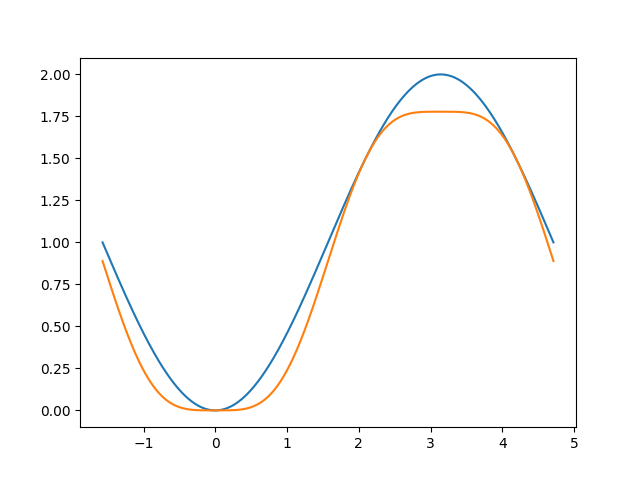

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
def twofreq_potential(phi, vratio, fratio, phis0, phis1):
    '''
    Returns the potential for a two frequency system
    phi: phase angles
    vratio: ratio of the two voltage V1/V0
    fratio: ratio of the two frequencies, harmonic number m = f1/f0
    phis0: synchonous phase of the fundamental frequency
    phis1: synchonous phase of the harmonic frequency
    '''
    firstpot=np.cos(phi) - np.cos(phis0) + np.sin(phis0) * (phi - phis0)
    secondpot = vratio/fratio * (np.cos(fratio * phi + phis1 - fratio*phis0) - np.cos(phis1) + fratio* np.sin(phis1) * (phi - phis0))
    return -firstpot -secondpot

phis=np.linspace(-np.pi/2, 3*np.pi/2, 1000)
potential0= twofreq_potential(phis, 0, 3, 0, 0)
potential= twofreq_potential(phis, -0.333, 3, 0, 0)
fig, ax = plt.subplots()
ax.plot(phis, potential0)
ax.plot(phis, potential)